In [75]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [76]:
file = 'C:/Users/CLINTON/Documents/GAMES Internship/Coursera/Unsupervised Learning/Project work.csv'
df = pd.read_csv(file)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [77]:
#Dropping the CUST_ID column
df.drop(['CUST_ID'], axis = 1, inplace = True)

In [78]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [79]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())


In [80]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].value_counts().idxmax())

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [82]:
data = df.copy()

In [83]:
#Checking Correlation
corr_mat = df.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,0.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,0.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,0.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,0.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,0.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,0.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,0.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,0.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,0.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,0.000000,0.799561,-0.131168,0.132608,0.183192,0.097898,-0.249773,-0.133372


In [84]:
corr_mat.abs().idxmax()

BALANCE                                                 CREDIT_LIMIT
BALANCE_FREQUENCY                                            BALANCE
PURCHASES                                           ONEOFF_PURCHASES
ONEOFF_PURCHASES                                           PURCHASES
INSTALLMENTS_PURCHASES                                     PURCHASES
CASH_ADVANCE                                        CASH_ADVANCE_TRX
PURCHASES_FREQUENCY                 PURCHASES_INSTALLMENTS_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY                             PURCHASES_TRX
PURCHASES_INSTALLMENTS_FREQUENCY                 PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
PURCHASES_TRX                                              PURCHASES
CREDIT_LIMIT                                                 BALANCE
PAYMENTS                                                   PURCHASES
MINIMUM_PAYMENTS                  

In [85]:
#Checking skewness in columns
log_columns = df.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

MINIMUM_PAYMENTS              13.867357
ONEOFF_PURCHASES              10.045083
PURCHASES                      8.144269
INSTALLMENTS_PURCHASES         7.299120
PAYMENTS                       5.907620
CASH_ADVANCE_TRX               5.721298
CASH_ADVANCE                   5.166609
PURCHASES_TRX                  4.630655
BALANCE                        2.393386
PRC_FULL_PAYMENT               1.942820
CASH_ADVANCE_FREQUENCY         1.828686
ONEOFF_PURCHASES_FREQUENCY     1.535613
CREDIT_LIMIT                   1.522636
dtype: float64

In [86]:
# The log transformations
for col in log_columns.index:
    df[col] = np.log1p(df[col])

In [87]:
#Scaling the Data
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in df.columns:
    df[col] = mms.fit_transform(df[[col]]).squeeze()

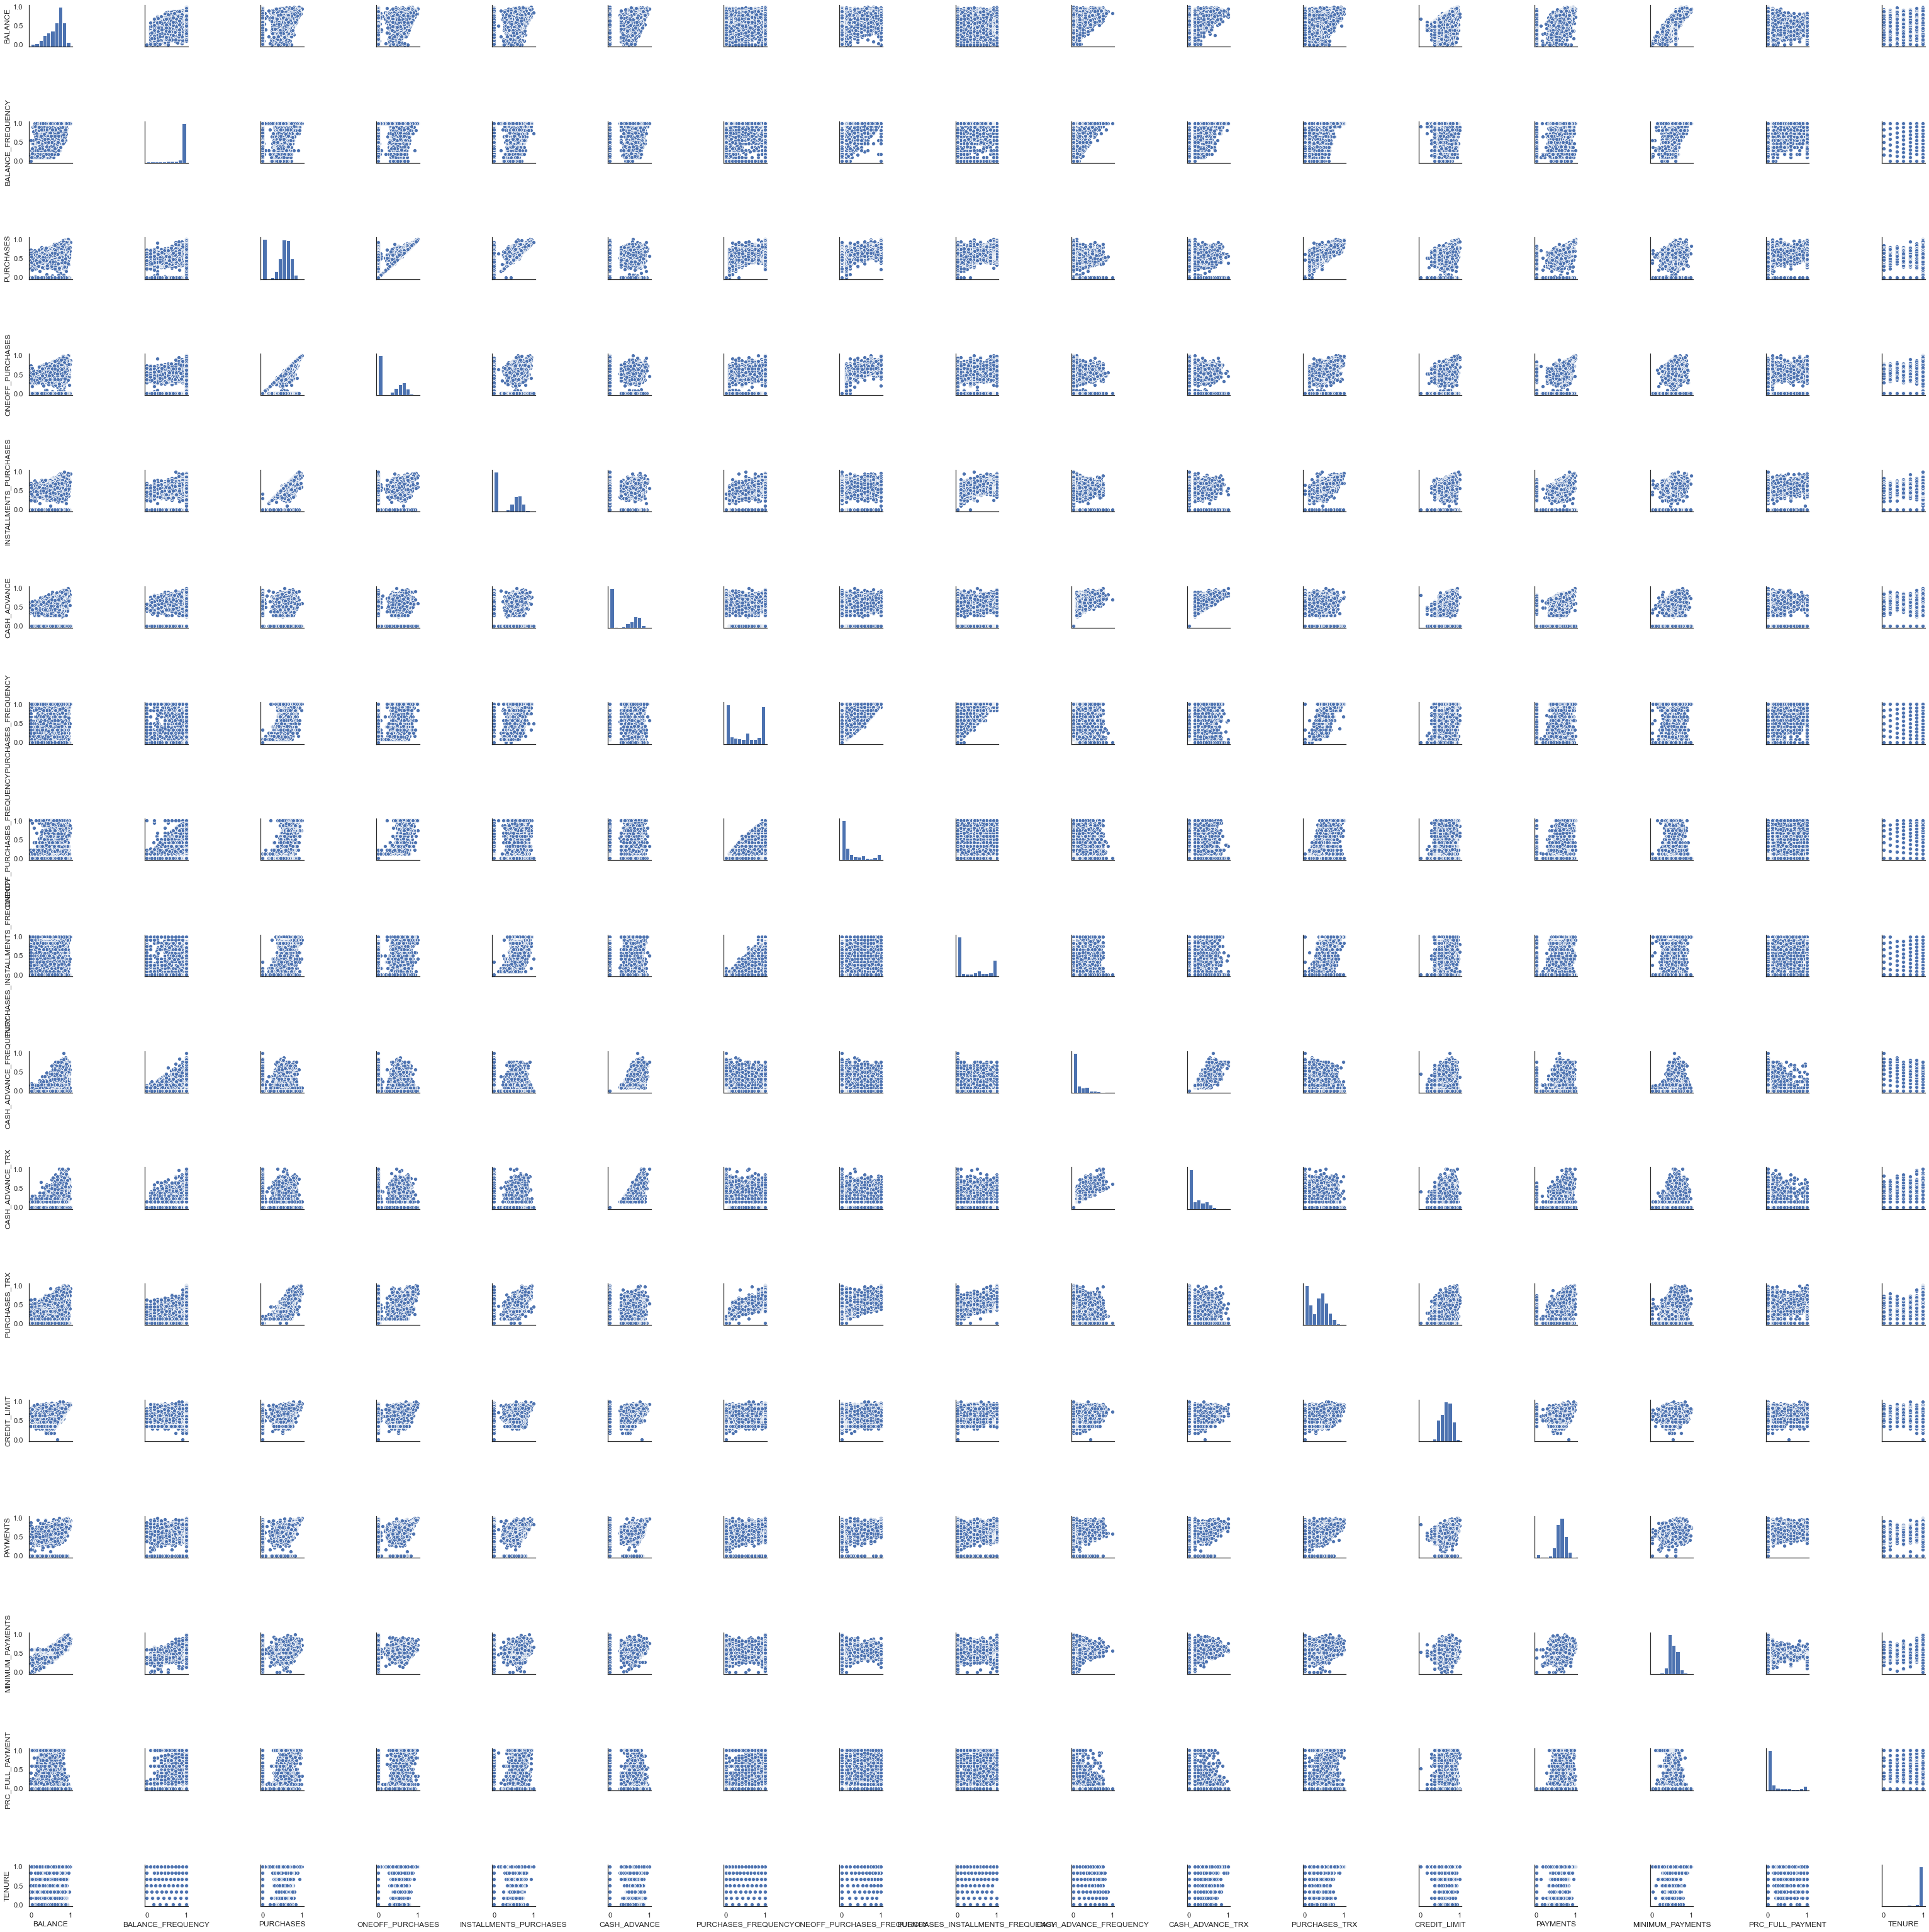

In [63]:
#Visualizing relationships betweeb variables
sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(df);

### Building Model

In [88]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8950.0,7.010609e-18,0.745222,-1.238107,-0.692789,0.070874,0.654964,1.700590
col2,8950.0,-3.421224e-17,0.438906,-1.040318,-0.317045,0.021778,0.292434,1.414347
col3,8950.0,3.121029e-17,0.397758,-1.060229,-0.261166,0.056253,0.273207,1.279434


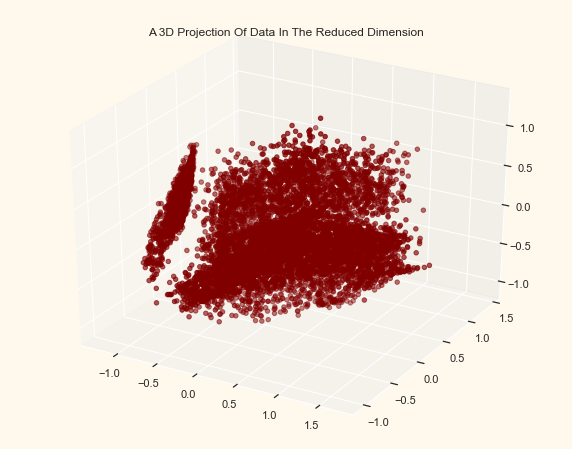

In [89]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [121]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.460755
2,PCA(n_components=2),0.620579
3,PCA(n_components=3),0.751841
4,PCA(n_components=4),0.818312
5,PCA(n_components=5),0.866254


In [122]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE
n,,,,,,,,,,,,,,,,,
1,0.014440,0.015107,0.081485,0.034121,0.045424,0.007167,0.108622,0.005885,0.060087,0.068187,0.011133,0.049231,0.097574,0.158543,0.140301,0.091535,0.011160
2,0.057418,0.046221,0.095015,0.045061,0.058568,0.019613,0.066429,0.020085,0.095480,0.099189,0.026816,0.058064,0.065467,0.084872,0.089092,0.061025,0.011583
3,0.056868,0.051415,0.104481,0.050080,0.065215,0.013090,0.070641,0.022589,0.102305,0.101077,0.023193,0.053806,0.056596,0.073072,0.104870,0.041277,0.009425
4,0.055416,0.046757,0.108384,0.053594,0.068790,0.014993,0.059107,0.024555,0.083981,0.090900,0.028997,0.111217,0.049561,0.061688,0.088016,0.033872,0.020171
5,0.059663,0.071837,0.100510,0.050879,0.063569,0.016550,0.050639,0.024218,0.075896,0.076809,0.036505,0.108226,0.046810,0.055883,0.075023,0.030070,0.056912


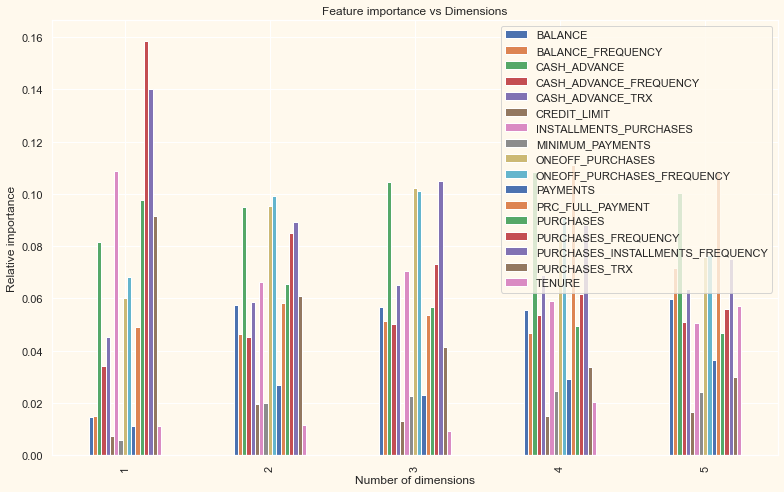

In [123]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

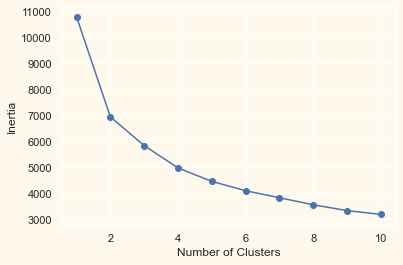

In [90]:
#Determining number of cluster using Elbow Method
from sklearn.cluster import KMeans
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df)
    inertia.append(km.inertia_)
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

##### The above cell indicates that four will be an optimal number of clusters for this data

In [91]:
#Fitting Kmeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
yhat_km = km.fit_predict(PCA_df)
PCA_df["CLUSTERS"] = yhat_km
data["CLUSTERS"] = yhat_km


In [92]:
PCA_df

,col1,col2,col3,CLUSTERS
0,-0.312012,-0.536007,-0.195625,3
1,-1.030435,0.075062,0.236443,1
2,0.391427,0.610731,-0.704263,2
3,-0.534389,0.204024,-0.429618,3
4,-0.547659,-0.164735,-0.388347,3
...,...,...,...,...
8945,0.639249,-0.724597,0.257172,0
8946,0.544564,-0.573993,0.362251,0
8947,0.371318,-0.716752,0.141892,0
8948,-0.908765,-0.536972,-0.157566,1


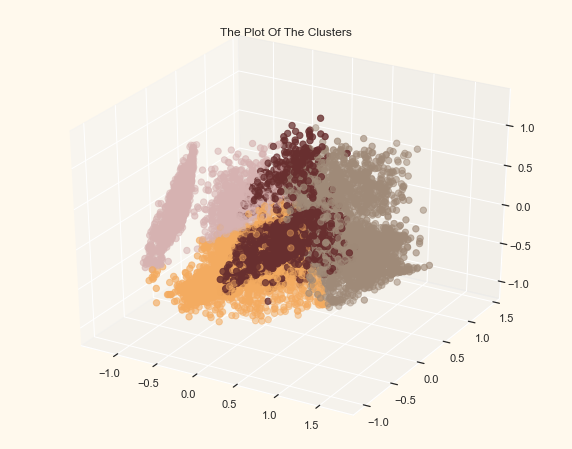

In [93]:
#Plotting the clusters
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["CLUSTERS"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [94]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["AC_Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["AC_Clusters"]= yhat_AC

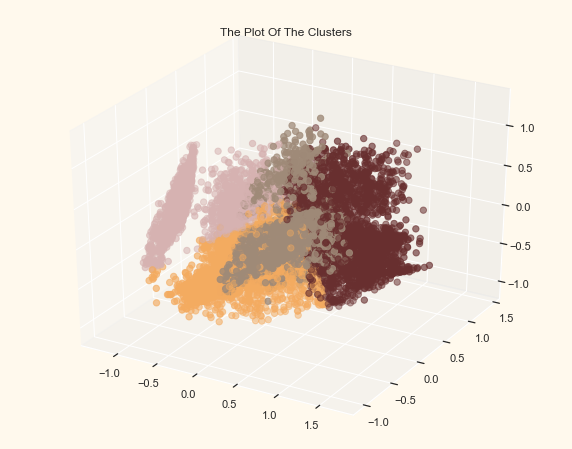

In [95]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["AC_Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

#### Evaluating Models

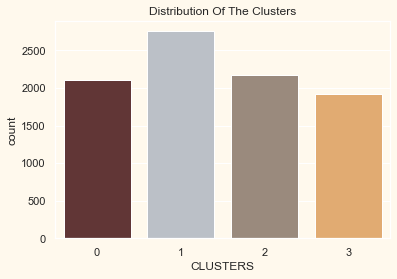

In [96]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["CLUSTERS"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


#### The clusters are fairly distributed

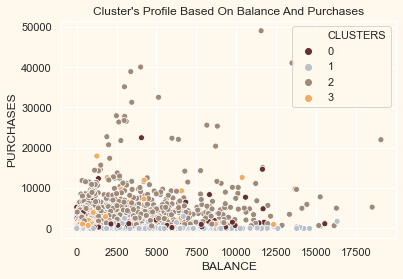

In [127]:

pl = sns.scatterplot(data = data,x=data["BALANCE"], y=data["PURCHASES"],hue=data["CLUSTERS"], palette= pal)
pl.set_title("Cluster's Profile Based On Balance And Purchases")
plt.legend()
plt.show()

#### Purchases vs Balance plot shows the following
- Group 0: Low/Moderate Balance and low purchase
- Group 1: Low Balance and Low Purchase
- Group 2: High Balance and High Purchase
- Group 3: Low Balance and Low Purchase

In [102]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS,AC_Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,3


In [104]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

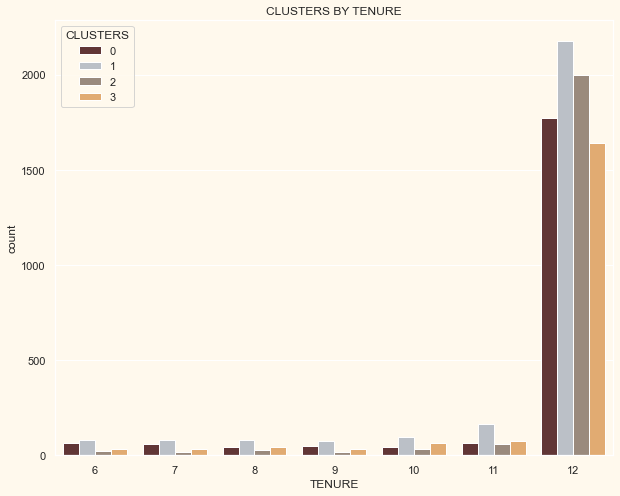

In [107]:
fig = plt.figure(figsize=(10,8))
pl = sns.countplot(x=data["TENURE"],hue=data["CLUSTERS"], palette= pal)
pl.set_title("CLUSTERS BY TENURE")
pl.set_xlabel("TENURE")
plt.show()

#### Insights
- Tenure 12 has most people in it with few people distributed across other tenures.
- Tenure 12 is clustered mostly around cluster 1 with a good number on other clusters

In [109]:
Payments_Cluster = data.groupby(['CLUSTERS'])['PAYMENTS'].mean().reset_index().sort_values(by="PAYMENTS",ascending=False)
Payments_Cluster

,CLUSTERS,PAYMENTS
2,2,3069.387148
1,1,1750.368639
3,3,1036.833194
0,0,969.175575


Text(0.5, 1.0, 'PAYMENTS BY CLUSTERS')

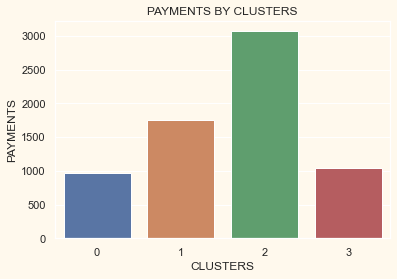

In [129]:
sns.barplot(x = Payments_Cluster['CLUSTERS'], y = Payments_Cluster['PAYMENTS'])

plt.xlabel('CLUSTERS')
plt.ylabel("PAYMENTS")
plt.title("PAYMENTS BY CLUSTERS")

##### Clearly Clusters B are our best customers as most of the payments came from them 

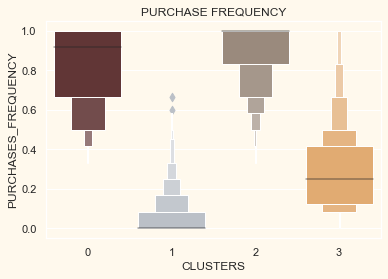

In [111]:
#Plotting the Purchase Frequency
plt.figure()
pl=sns.boxenplot(y=data["PURCHASES_FREQUENCY"],x=data["CLUSTERS"], palette= pal)
pl.set_title("PURCHASE FREQUENCY")
plt.show()

#### Insights
- Clusters 2 and 0 have the most customers with most Purchase frequency, with cluster 1 having the lowest Purchase frequency
- The median in the boxen plot for Cluster 2 shows that it has the highest purchase frequency averagely

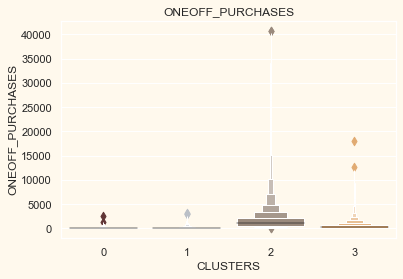

In [115]:
#One Off Purchases
plt.figure()
pl=sns.boxenplot(y=data["ONEOFF_PURCHASES"],x=data["CLUSTERS"], palette= pal)
pl.set_title("ONEOFF_PURCHASES")
plt.show()

##### Customers in Cluster 2 engaged mostly in Oneoff-Purchases with Cluster 0 customers having the least engagement

In [117]:
Installment_Purchases = data.groupby(['CLUSTERS'])['INSTALLMENTS_PURCHASES'].mean().reset_index().sort_values(by="INSTALLMENTS_PURCHASES",ascending=False)
Installment_Purchases

,CLUSTERS,INSTALLMENTS_PURCHASES
2,2,960.091277
0,0,671.771363
3,3,72.403425
1,1,15.771956


Text(0.5, 1.0, 'INSTALLMENTS PURCHASES BY CLUSTERS')

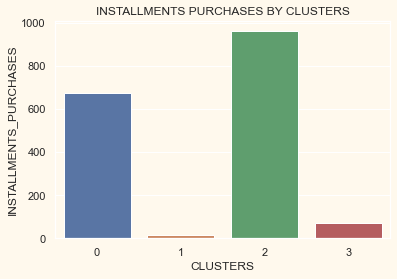

In [118]:
sns.barplot(x = Installment_Purchases['CLUSTERS'], y = Installment_Purchases['INSTALLMENTS_PURCHASES'])

plt.xlabel('CLUSTERS')
plt.ylabel("INSTALLMENTS_PURCHASES")
plt.title("INSTALLMENTS PURCHASES BY CLUSTERS")

##### Customers in Cluster 2 engaged mostly in Installment Purchases with Cluster 1 having the least engagement

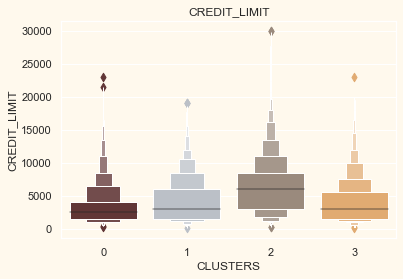

In [119]:
plt.figure()
pl=sns.boxenplot(y=data["CREDIT_LIMIT"],x=data["CLUSTERS"], palette= pal)
pl.set_title("CREDIT_LIMIT")
plt.show()

#### Cluster 1 have customers with the highest Credit limit 

In [125]:
Balance_freq = data.groupby(['CLUSTERS'])['BALANCE_FREQUENCY'].mean().reset_index().sort_values(by="BALANCE_FREQUENCY",ascending=False)
Balance_freq

,CLUSTERS,BALANCE_FREQUENCY
2,2,0.980151
1,1,0.900740
0,0,0.878580
3,3,0.726014


Text(0.5, 1.0, 'BALANCE_FREQUENCY BY CLUSTERS')

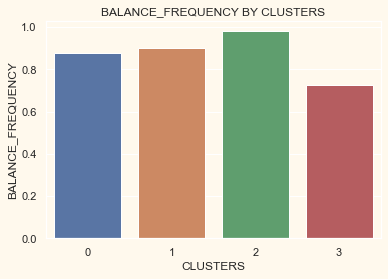

In [126]:
sns.barplot(x = Balance_freq['CLUSTERS'], y = Balance_freq['BALANCE_FREQUENCY'])

plt.xlabel('CLUSTERS')
plt.ylabel("BALANCE_FREQUENCY")
plt.title("BALANCE_FREQUENCY BY CLUSTERS")

#### All clusters have high Balance frequency with Cluster 2 slightly having the highest frequency